

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('petrol_consumption.csv')
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [2]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

# Lets first check if there are outliers present in the data or not

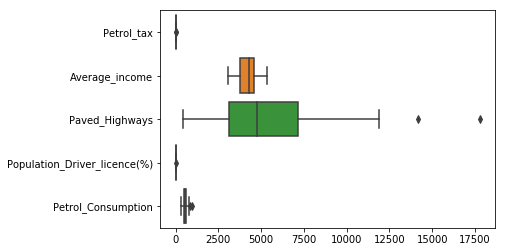

In [5]:
sns.boxplot(data=df,orient='h')

# Well its evident from the above graph that there are outliers present in more than one column. Lets proceed with dealing with outliers as per the criteria given.

In [24]:
def out(df_in,col):
    q1 = df_in[col].quantile(0.25)
    q3 = df_in[col].quantile(0.75)
    IQR = q3-q1
    uw = q3+(1.5*IQR)
    lw =q1-(1.5*IQR)
    df_out = df_in[~((df_in < (q1 - 1.5 * IQR)) |(df_in > (q3 + 1.5 * IQR))).any(axis=1)]
    return df_out

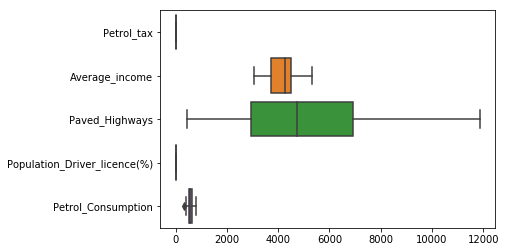

In [25]:
df1 = out(df,df.columns)
sns.boxplot(data=df1,orient='h')

# Outliers have been remove and the new data is in df1

# Question 3 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [66]:
df1.rename({'Population_Driver_licence(%)':'Population_Driver_licence'},axis=1,inplace=True)

C:\Users\KUS\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [67]:
df1.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence,Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


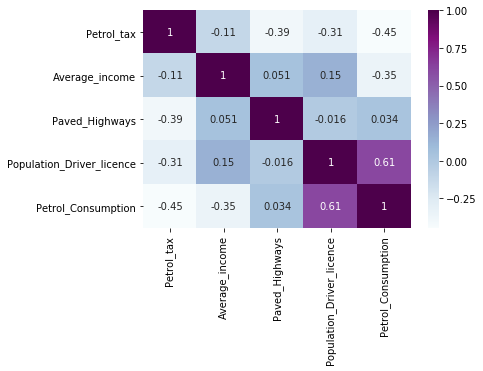

In [68]:
sns.heatmap(df1.corr(),annot=True,cmap='BuPu')

# From the above heatmap we can conclude that Population_Driver_License is affecting the value of Petrol_consumption more  .. Lets check it using the Univariate Linear Regression Model

# Here the target (Also known as Dependent) value is Petrol_Consumption and all the others are vaiables are independent variables

In [69]:
x = df1[['Petrol_tax','Population_Driver_licence']]
y = df1['Petrol_Consumption']

# Question 4 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [70]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [43]:
x_train.shape

(34, 1)

In [44]:
y_train.shape

(34,)

In [45]:
x_test.shape

(9, 1)

In [46]:
y_test.shape

(9,)

# Question 5 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
LR = LinearRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)

In [90]:
a = LR.coef_
a

array([-25.76434611, 831.59976602])

In [101]:
df2 = pd.DataFrame({'Petrol_tax':[a[0]],'Population_Driver_licence':[a[1]]})
df2.rename({0:'Coeff'},axis=0,inplace=True)
df2.head()

,Petrol_tax,Population_Driver_licence
Coeff,-25.764346,831.599766


In [85]:
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

model1 = ols('Petrol_Consumption~Petrol_tax+Population_Driver_licence',df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Petrol_Consumption   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     16.08
Date:                Fri, 30 Aug 2019   Prob (F-statistic):           7.51e-06
Time:                        10:33:55   Log-Likelihood:                -239.76
No. Observations:                  43   AIC:                             485.5
Df Residuals:                      40   BIC:                             490.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   284.2964    179.307      1.586      0.121     -78.096     646.689
Petrol_tax                  -29.4390     12.972     -2.269      0.029     -55.657      -3.221
Population_Driver_licence   897.3036    212.700      4.219      0.000     467.421    1327.186
==============================================================================
Omnibus:                        0.195   Durbin-Watson:                   1.404
Prob(Omnibus):                  0.907   Jarque-Bera (JB):                0.401
Skew:                          -0.005   Prob(JB):                        0.818
Kurtosis:                       2.527   Cond. No.                         208.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# R-Square 

# Question 6 - Evaluate the model 
Calculate the accuracy score for the above model.

# RMSE

In [86]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

70.77053790510239

# Accuracy - R-Square

In [87]:
model1.rsquared

0.44565849673890046

# Question 7: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [88]:
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

model2 = ols('Petrol_Consumption~Petrol_tax+Population_Driver_licence+Average_income+Paved_Highways',df1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Petrol_Consumption   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     18.77
Date:                Fri, 30 Aug 2019   Prob (F-statistic):           1.37e-08
Time:                        10:34:05   Log-Likelihood:                -229.00
No. Observations:                  43   AIC:                             468.0
Df Residuals:                      38   BIC:                             476.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   600.9070    167.754      3.582      0.001     261.306     940.508
Petrol_tax                  -35.8628     11.414     -3.142      0.003     -58.969     -12.756
Population_Driver_licence   983.2261    173.497      5.667      0.000     632.000    1334.452
Average_income               -0.0728      0.015     -4.906      0.000      -0.103      -0.043
Paved_Highways               -0.0021      0.003     -0.641      0.525      -0.009       0.004
==============================================================================
Omnibus:                        1.501   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.472   Jarque-Bera (JB):                0.946
Skew:                           0.359   Prob(JB):                        0.623
Kurtosis:                       3.105   Cond. No.                     1.96e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
model2.rsquared

0.6639367664384646

# Question 8: Print the coefficients of the multilinear regression model

In [89]:
model2.params

Intercept                    600.907024
Petrol_tax                   -35.862824
Population_Driver_licence    983.226067
Average_income                -0.072810
Paved_Highways                -0.002078
dtype: float64

# Question 9
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

In [103]:
print('R Square of Model 1 having only 2 independent variables is {}'.format(model1.rsquared))
print('R Square of Model 2 having 4 independent variables is {}'.format(model2.rsquared))

R Square of Model 1 having only 2 independent variables is 0.44565849673890046
R Square of Model 2 having 4 independent variables is 0.6639367664384646


# It is clear from the above R square values that the accuracy of the model increases as the number of independent variables increases. Although not true in all circumstances. Clearly Population_Driver_licence plays an important role in deciding the value of the target variable, but Population_Driver_licence when used alone had an accuracy which was less than the accuracy when all the members were made independent variables.